In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np

In [8]:
dataframe = pd.read_csv("Q2_insurance_dataset.csv")
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Prerocessing Step
In the preprocessing step, we convert the data which is not computer-friendly into numerical format. For example, the field `'sex'` can be classified (according to the given dataset) into the binary values `(0, 1)`. Similarly `being a smoker or not` can be classified as `(1, 0)` respectively.
The field `'region'` can be broken down into four columns and based on the value for a row, one of the colums will be set to `1`, while the others will be set to `0`. This is called `'One-Hot Encoding'`.

In [9]:
dataframe["sex"] = [{"male": 0, "female": 1}[item] for item in dataframe["sex"]]
dataframe["smoker"] = [{"no": 0, "yes": 1}[item] for item in dataframe["smoker"]]

dataframe["region0"] = dataframe["region1"] = dataframe["region2"] = dataframe["region3"] = 0

for i, item in enumerate(dataframe["region"]):
    if item == "southeast":
        dataframe.at[i, "region0"] = 1
    elif item == "northwest":
        dataframe.at[i, "region1"] = 1
    elif item == "southwest":
        dataframe.at[i, "region2"] = 1
    else:
        dataframe.at[i, "region3"] = 1

dataframe.drop("region", axis=1, inplace=True)
dataframe.head()

,age,sex,bmi,children,smoker,charges,region0,region1,region2,region3
0,19,1,27.900,0,1,16884.92400,0,0,1,0
1,18,0,33.770,1,0,1725.55230,1,0,0,0
2,28,0,33.000,3,0,4449.46200,1,0,0,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


### Building the Model

In [43]:
# Prepare datasets
# charge data is the target to be predicted
Y = dataframe["charges"].to_numpy()
X = dataframe.drop(["charges"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# Build and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Checking the Predictions and Accuracy

In [44]:
# Predict the Output
Y_predicted = abs(model.predict(X_test))
Y_predicted

array([ 5844.01337262,  6367.01573793,  8077.78847673,  3250.58292998,
        7325.76950963, 15421.91749279,  5263.68668079, 26423.58107082,
       38202.99516904, 30830.44924904, 39582.39489344,  2793.63812703,
       14555.0992602 , 11905.41584825, 11404.6979574 ,  4383.98201034,
        7645.56258438,  6615.59763185,  1749.04657409, 13379.32861398,
       29845.5012989 , 27994.1118384 ,  9518.14018299,  7428.73036823,
        6878.39248916, 25265.48434836,  6380.36835759,  6804.10806518,
       31947.37308809,  3838.87190096, 11384.17268538, 13008.56371418,
        8681.28603497,  9832.43561232,  8656.3489069 ,   979.60877146,
        6947.41236357,  7183.90380285, 11815.51689528, 31017.56052073,
        3143.19998457, 12133.92198904,  9933.31295475,  7054.80057402,
       12891.48355062, 28447.96270064, 12188.69295554, 12623.3576333 ,
       33104.96647065, 11365.71704953, 10800.62423617, 33161.22995888,
        8647.90593097,  3444.23731649,  8080.16129863, 12368.37083577,
      

In [45]:
# We will check the difference in logarithms of the test and predicted values
# This is because for large numbers, the ordr of magnitude matters more than precision

mse = metrics.mean_squared_error(Y_test, Y_predicted)
mae = metrics.mean_absolute_error(Y_test, Y_predicted)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mse)

lmse = metrics.mean_squared_error(np.log(Y_test), np.log(Y_predicted))
lmae = metrics.mean_absolute_error(np.log(Y_test), np.log(Y_predicted))
print("Log Mean Squared Error:", lmse)
print("Log Mean Absolute Error:", lmae)

print("\nAccuracy:", model.score(X_test, Y_test) * 100, "%")

Mean Squared Error: 36828744.62144231
Mean Absolute Error: 36828744.62144231
Log Mean Squared Error: 0.39296566279449296
Log Mean Absolute Error: 0.4211938103588646

Accuracy: 75.40660616697382 %


### Analysis of the Model and its predictions

In [46]:
copy = X_test.copy()
copy["Y_pred"] = Y_predicted
copy["Y_test"] = Y_test

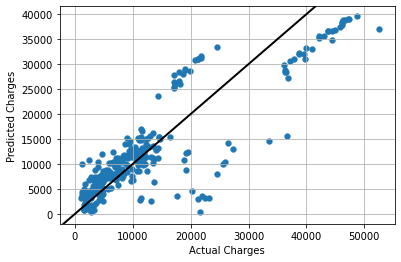

In [47]:
plt.scatter(Y_test, Y_predicted, linewidths=0.25)
plt.axline((0, 0), slope=1, color="black", linewidth=2)

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

plt.grid(True)
plt.show()

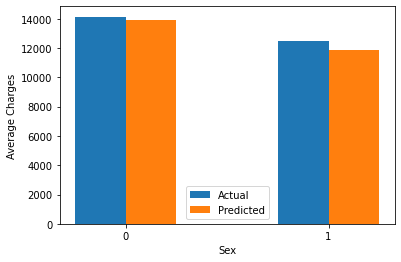

In [48]:
actual = [copy[copy["sex"] == i]["Y_test"].mean() for i in range(2)]
predicted = [copy[copy["sex"] == i]["Y_pred"].mean() for i in range(2)]

plt.bar([-0.125, 0.875], actual, width=0.25, label="Actual")
plt.bar([+0.125, 1.125], predicted, width=0.25, label="Predicted")

plt.xticks([0, 1])
plt.xlabel("Sex")
plt.ylabel("Average Charges")

plt.legend()
plt.show()

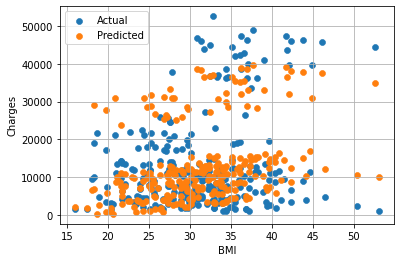

In [49]:
plt.scatter(X_test["bmi"], Y_test, linewidths=0.60, label="Actual")
plt.scatter(X_test["bmi"], Y_predicted, linewidths=0.60, label="Predicted")

plt.xlabel("BMI")
plt.ylabel("Charges")

plt.grid(True)
plt.legend()
plt.show()

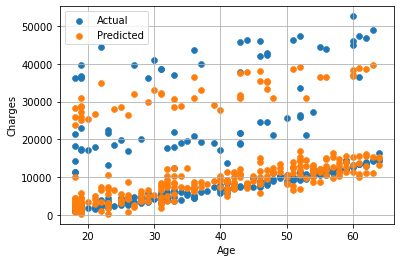

In [50]:
plt.scatter(X_test["age"], Y_test, linewidths=0.60, label="Actual")
plt.scatter(X_test["age"], Y_predicted, linewidths=0.60, label="Predicted")

plt.xlabel("Age")
plt.ylabel("Charges")

plt.grid(True)
plt.legend()
plt.show()

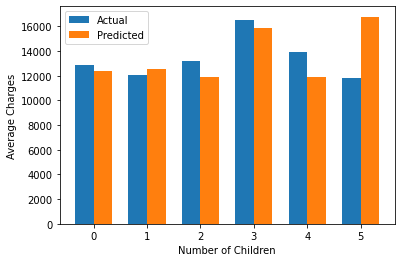

In [51]:
actual = [copy[copy["children"] == i]["Y_test"].mean() for i in range(6)]
predicted = [copy[copy["children"] == i]["Y_pred"].mean() for i in range(6)]

plt.bar(np.array(range(6))-0.175, actual, width=0.35, label="Actual")
plt.bar(np.array(range(6))+0.175, predicted, width=0.35, label="Predicted")

plt.xticks(range(6))
plt.xlabel("Number of Children")
plt.ylabel("Average Charges")
plt.legend()
plt.show()

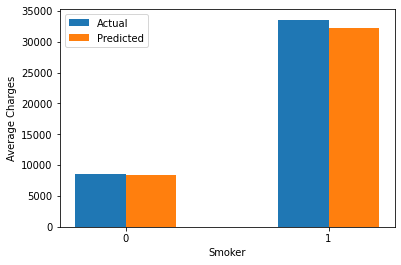

In [52]:
actual = [copy[copy["smoker"] == i]["Y_test"].mean() for i in range(2)]
predicted = [copy[copy["smoker"] == i]["Y_pred"].mean() for i in range(2)]

plt.bar([-0.125, 0.875], actual, width=0.25, label="Actual")
plt.bar([+0.125, 1.125], predicted, width=0.25, label="Predicted")

plt.xticks([0, 1])
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.legend()
plt.show()

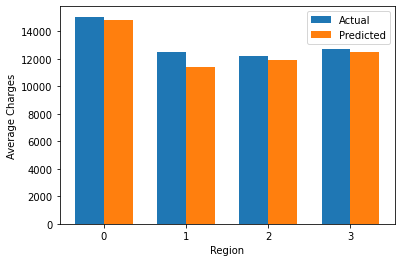

In [53]:
actual = [copy[copy[f"region{i}"] == 1]["Y_test"].mean() for i in range(4)]
predicted = [copy[copy[f"region{i}"] == 1]["Y_pred"].mean() for i in range(4)]

plt.bar(np.array(range(4))-0.175, actual, width=0.35, label="Actual")
plt.bar(np.array(range(4))+0.175, predicted, width=0.35, label="Predicted")

plt.xticks(range(4))
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.legend()
plt.show()